***Neural Network & Deep Leaning Final Project***

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
normal_folder = 'Normal_Sperm'
abnormal_folder = 'Abnormal_Sperm'
non_sperm_folder = 'Non-Sperm'

In [4]:
# Function to load and resize images from a folder
def load_and_resize_images_from_folder(folder, label, target_size=(128, 128)):
    images = []
    labels = []
    
    # Loop over the images in the folder
    for filename in os.listdir(folder):
        if filename.endswith('.bmp'):
            img_path = os.path.join(folder, filename)
            
            # Open the image using PIL
            img = Image.open(img_path)
            
            # Resize the image to a consistent shape
            img = img.resize(target_size)
            
            # Convert the image to a numpy array and normalize pixel values to range [0, 1]
            img_array = np.array(img) / 255.0  # Normalization
            
            images.append(img_array)
            labels.append(label)
    
    return images, labels

In [5]:
# Load and preprocess the images from each folder
normal_images, normal_labels = load_and_resize_images_from_folder(normal_folder, 0)  # 0 for normal sperm
abnormal_images, abnormal_labels = load_and_resize_images_from_folder(abnormal_folder, 1)  # 1 for abnormal sperm
non_sperm_images, non_sperm_labels = load_and_resize_images_from_folder(non_sperm_folder, 2)  # 2 for non sperm

In [6]:
# Combine all images and labels
all_images = np.array(normal_images + abnormal_images + non_sperm_images)
all_labels = np.array(normal_labels + abnormal_labels + non_sperm_labels)

In [7]:
# Shuffle the dataset (optional)
indices = np.random.permutation(all_images.shape[0])
all_images = all_images[indices]
all_labels = all_labels[indices]

In [8]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
# Print the shape of the data
print(f'Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}')

Training set: (2100, 128, 128, 3), Validation set: (450, 128, 128, 3), Test set: (450, 128, 128, 3)


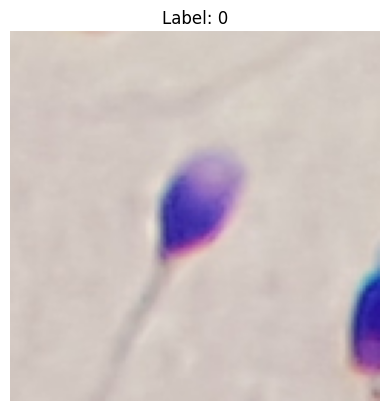

In [10]:
# Visualize a sample image
plt.imshow(X_train[0])
plt.title(f'Label: {y_train[0]}')
plt.axis('off')
plt.show()

Implementation of tensorflow framework

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [12]:
# Define the model architecture
def create_cnn_model(input_shape=(128, 128, 3), num_classes=3):
    model = models.Sequential()
    
    # 1st Convolutional Block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # 2nd Convolutional Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # 3rd Convolutional Block
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flatten the feature maps into a 1D vector
    model.add(layers.Flatten())
    
    # Dense layer with Dropout for regularization
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    
    # Output layer with softmax for multi-class classification
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [13]:
# Create the model
model = create_cnn_model()

C:\Users\Léonard\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Reshape the training, validation, and test data to match the input shape (height, width, channels)
X_train = X_train.reshape(-1, 128, 128, 3)
X_val = X_val.reshape(-1, 128, 128, 3)
X_test = X_test.reshape(-1, 128, 128, 3)

In [16]:
# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=20,  # You can adjust the number of epochs
    batch_size=32,  # You can adjust the batch size
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/20
65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.3943 - loss: 1.2527

AbortedError: Graph execution error:

Detected at node StatefulPartitionedCall/gradient_tape/sequential_1/max_pooling2d_1_2/MaxPool2d/MaxPoolGrad defined at (most recent call last):
<stack traces unavailable>
Compute received an exception:Status:1, message: could not create a memory object. in file tensorflow/core/kernels/mkl/mkl_maxpooling_op.cc:388
	 [[{{node StatefulPartitionedCall/gradient_tape/sequential_1/max_pooling2d_1_2/MaxPool2d/MaxPoolGrad}}]] [Op:__inference_multi_step_on_iterator_2053]

In [ ]:
# Save the trained model for later use
model.save('sperm_classification_model.h5')